In [175]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, PredictionErrorDisplay
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

In [176]:
data = pd.read_csv('combined_dataset.csv')

In [177]:
data.head()

,Unnamed: 0,Time,Temprature,%tanD,Resistivity,Permittivity,I_pol(t)(uA),hour,BDV
0,0,1,30,0.0,1249215000000000,2.15,0.00583,0,29.0
1,1,2,30,0.0,1249215000000000,2.15,0.00584,0,29.0
2,2,3,30,0.0,1249215000000000,2.15,0.00581,0,29.0
3,3,4,30,0.0,1249215000000000,2.15,0.00575,0,29.0
4,4,5,30,0.0,1249215000000000,2.15,0.00569,0,29.0


In [178]:
data = data.drop('Unnamed: 0', axis=1)
print(data.dtypes)

Time              int64
Temprature        int64
%tanD           float64
Resistivity       int64
Permittivity    float64
I_pol(t)(uA)    float64
hour              int64
BDV             float64
dtype: object


In [179]:
select_columns=['Time','Temprature', '%tanD', 'Resistivity', 'Permittivity', 'I_pol(t)(uA)']
givenHour=384
givenTemp=80
data_temp_hr = data[(data['hour'] == givenHour) & (data['Temprature'] == givenTemp)]

In [180]:
data_temp_hr.shape

(470, 8)

In [181]:
data_temp_hr.head()

,Time,Temprature,%tanD,Resistivity,Permittivity,I_pol(t)(uA),hour,BDV
36660,1,80,0.22,5997475000000,2.0,0.542856,384,31.0
36661,2,80,0.22,5997475000000,2.0,0.542613,384,31.0
36662,3,80,0.22,5997475000000,2.0,0.542370,384,31.0
36663,4,80,0.22,5997475000000,2.0,0.542127,384,31.0
36664,5,80,0.22,5997475000000,2.0,0.541885,384,31.0


In [182]:
unique_counts = data_temp_hr.nunique()
print(unique_counts)

Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


In [183]:
data_temp_hr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 470 entries, 36660 to 37129
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          470 non-null    int64  
 1   Temprature    470 non-null    int64  
 2   %tanD         470 non-null    float64
 3   Resistivity   470 non-null    int64  
 4   Permittivity  470 non-null    float64
 5   I_pol(t)(uA)  470 non-null    float64
 6   hour          470 non-null    int64  
 7   BDV           470 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 33.0 KB


In [184]:
data_temp_hr.isnull().sum()

Time            0
Temprature      0
%tanD           0
Resistivity     0
Permittivity    0
I_pol(t)(uA)    0
hour            0
BDV             0
dtype: int64

In [185]:
data_temp_hr.describe()

,Time,Temprature,%tanD,Resistivity,Permittivity,I_pol(t)(uA),hour,BDV
count,470.000000,470.0,4.700000e+02,4.700000e+02,470.0,470.000000,470.0,470.0
mean,235.500000,80.0,2.200000e-01,5.997475e+12,2.0,0.499501,384.0,31.0
std,135.821574,0.0,8.335545e-17,0.000000e+00,0.0,0.021766,0.0,0.0
min,1.000000,80.0,2.200000e-01,5.997475e+12,2.0,0.467211,384.0,31.0
25%,118.250000,80.0,2.200000e-01,5.997475e+12,2.0,0.480340,384.0,31.0
50%,235.500000,80.0,2.200000e-01,5.997475e+12,2.0,0.496744,384.0,31.0
75%,352.750000,80.0,2.200000e-01,5.997475e+12,2.0,0.517243,384.0,31.0
max,470.000000,80.0,2.200000e-01,5.997475e+12,2.0,0.542856,384.0,31.0


In [186]:
label_encoder = LabelEncoder()
for column in data_temp_hr.columns:
    data_temp_hr[column] = label_encoder.fit_transform(data_temp_hr[column])

C:\Users\hp\AppData\Local\Temp\ipykernel_19232\816520592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp_hr[column] = label_encoder.fit_transform(data_temp_hr[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_19232\816520592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_temp_hr[column] = label_encoder.fit_transform(data_temp_hr[column])
C:\Users\hp\AppData\Local\Temp\ipykernel_19232\816520592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [187]:
scaler = MinMaxScaler()
data_temp_hr_scaled = pd.DataFrame(scaler.fit_transform(data_temp_hr), columns=data_temp_hr.columns)

In [188]:
data_temp_hr_scaled.head()

,Time,Temprature,%tanD,Resistivity,Permittivity,I_pol(t)(uA),hour,BDV
0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0
1,0.002132,0.0,0.0,0.0,0.0,0.997868,0.0,0.0
2,0.004264,0.0,0.0,0.0,0.0,0.995736,0.0,0.0
3,0.006397,0.0,0.0,0.0,0.0,0.993603,0.0,0.0
4,0.008529,0.0,0.0,0.0,0.0,0.991471,0.0,0.0


In [189]:
unique_counts = data_temp_hr_scaled.nunique()
print(unique_counts)

Time            470
Temprature        1
%tanD             1
Resistivity       1
Permittivity      1
I_pol(t)(uA)    470
hour              1
BDV               1
dtype: int64


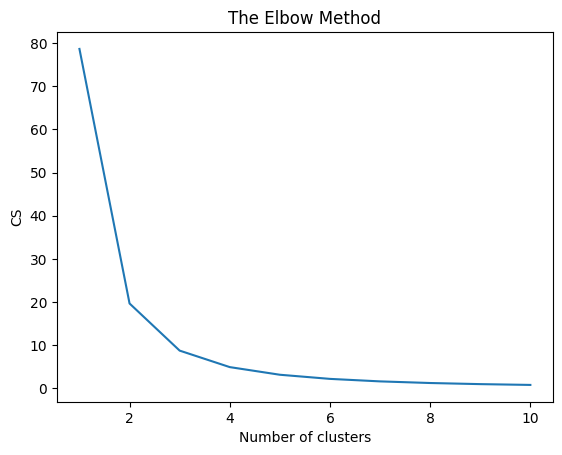

In [190]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_temp_hr_scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [191]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2, 11) 
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_temp_hr_scaled)
    score = silhouette_score(data_temp_hr_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

Number of clusters: 2, Silhouette Score: 0.6251360289039706
Number of clusters: 3, Silhouette Score: 0.587602487915417
Number of clusters: 4, Silhouette Score: 0.5682824344366054
Number of clusters: 5, Silhouette Score: 0.5562422144148002
Number of clusters: 6, Silhouette Score: 0.5478613538451876
Number of clusters: 7, Silhouette Score: 0.5416140746247243
Number of clusters: 8, Silhouette Score: 0.5365910439682333
Number of clusters: 9, Silhouette Score: 0.5324687198988783
Number of clusters: 10, Silhouette Score: 0.5284012403657735


In [192]:
from sklearn.ensemble import RandomForestRegressor  # Or RandomForestClassifier for classification
from sklearn.model_selection import cross_val_score
import numpy as np

# Assuming the target column is the last column
X = data_temp_hr_scaled.iloc[:,:-3]  # Features
y = data_temp_hr_scaled.iloc[:,-3]   # Target variable (continuous for regression)

# Test different values of n_estimators
n_estimators_range = [50, 100, 200, 300, 500]
mean_scores = []

# Loop over different n_estimators values
for n in n_estimators_range:
    rf_regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    # Cross-validation with negative mean absolute error as the scoring metric
    scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='neg_mean_absolute_error')
    mean_scores.append(np.mean(scores))

# Find the best n_estimators
best_n_estimators = n_estimators_range[np.argmax(mean_scores)]
print(f"Best n_estimators value: {best_n_estimators}")


Best n_estimators value: 100


In [193]:
# All ML Models
# Function to split data into features and labels
def split_data(data):
    X = data[['Time', 'Temprature', '%tanD', 'Resistivity', 'Permittivity', 'hour', 'BDV']]
    y = data['I_pol(t)(uA)']
    return X, y

def train_linear_regression(X_train, y_train):
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    return linear_model

# Function to train Polynomial Regression model
def train_polynomial_regression(X_train, y_train, degree=2):
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)
    return poly_model, poly_features

# Function to train Neural Network model
def train_neural_network(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='tanh', learning_rate_init=0.001, max_iter=2000, random_state=1)
    nn_model.fit(X_train_scaled, y_train)
    return nn_model, scaler

# Function to train K-Nearest Neighbors model
def train_knn(X_train, y_train, n_neighbors=2):
    knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_model.fit(X_train, y_train)
    return knn_model

# Function to train Support Vector Regression model
def train_svr(X_train, y_train):
    svr_model = SVR(kernel='rbf')
    svr_model.fit(X_train, y_train)
    return svr_model

# Function to train Decision Tree Regression model
def train_decision_tree(X_train, y_train):
    tree_model = DecisionTreeRegressor(random_state=42)
    tree_model.fit(X_train, y_train)
    return tree_model

# Function to train Random Forest Regression model
def train_random_forest(X_train, y_train):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

# Function to train Gradient Boosting Regression model
def train_gradient_boosting(X_train, y_train):
    gb_model = GradientBoostingRegressor(n_estimators=100, random_state=1)
    gb_model.fit(X_train, y_train)
    return gb_model

# Function to predict with a model (for Polynomial Regression, pass the poly_features as well)
def predict(model, X_test, poly_features=None, scaler=None):
    if poly_features:
        X_test_transformed = poly_features.transform(X_test)
        return model.predict(X_test_transformed)
    elif scaler:
        X_test_scaled = scaler.transform(X_test)
        return model.predict(X_test_scaled)
    return model.predict(X_test)

# Function to evaluate models (returns a dictionary of metrics)
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return {'MSE': mse, 'R2 Score': r2, 'MAE': mae}

# Function to save results to a text file
def save_results_to_file(results, file_path='result.txt'):
    with open(file_path, 'w') as f:
        f.write("Model Comparison Results:\n")
        f.write("Model\tMSE\tR2 Score\tMAE\tMean % Error\n")
        for i in range(len(results['Model'])):
            f.write(f"{results['Model'][i]}\t{results['MSE'][i]:.4f}\t{results['R2 Score'][i]:.4f}\t{results['MAE'][i]:.4f}\t{results['Mean % Error'][i]:.4f}\n")

# Function to compare models and print results
def compare_models(results):
    from IPython.display import display
    comparison_df = pd.DataFrame(results)
    display(comparison_df.sort_values(by='Mean % Error', ascending=True))
    return comparison_df  # Return for further use

# Function to calculate mean percentage error
def mean_percentage_error(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual) * 100)


In [194]:
def store_results_and_plot(results, model_name, metrics, y_test, y_pred):
    """
    Stores the evaluation metrics in the results dictionary and displays the prediction error plot 
    with labels indicating the algorithm name.

    Parameters:
    - results: Dictionary to store evaluation metrics
    - model_name: Name of the model (e.g., 'Linear Regression')
    - metrics: Dictionary containing evaluation metrics (e.g., 'MSE', 'R2 Score', 'MAE')
    - y_test: Actual target values from the test set
    - y_pred: Predicted target values
    """
    global subplot_idx  # Use the global subplot index to track which subplot to use
    ax = plt.subplot(3, 2, subplot_idx)
    # Store the results in the results dictionary
    results['Model'].append(model_name)
    results['MSE'].append(metrics['MSE'])
    results['R2 Score'].append(metrics['R2 Score'])
    results['MAE'].append(metrics['MAE'])
    results['Mean % Error'].append(mean_percentage_error(y_test, y_pred))

    # Create a prediction error plot with kind='actual_vs_predicted'
    display = PredictionErrorDisplay.from_predictions(y_test, y_pred, kind='actual_vs_predicted',ax=ax)

    # Customize the plot with labels and titles
    display.ax_.set_title(f'Actual vs Predicted: {model_name}')
    subplot_idx += 1 

,Model,MSE,R2 Score,MAE,Mean % Error
2,Random Forest Regression,0.000002,0.999979,0.001237,0.952898
0,K-Nearest Neighbors,0.000006,0.999945,0.002268,1.583374
1,Decision Tree Regression,0.000006,0.999945,0.002268,1.583374


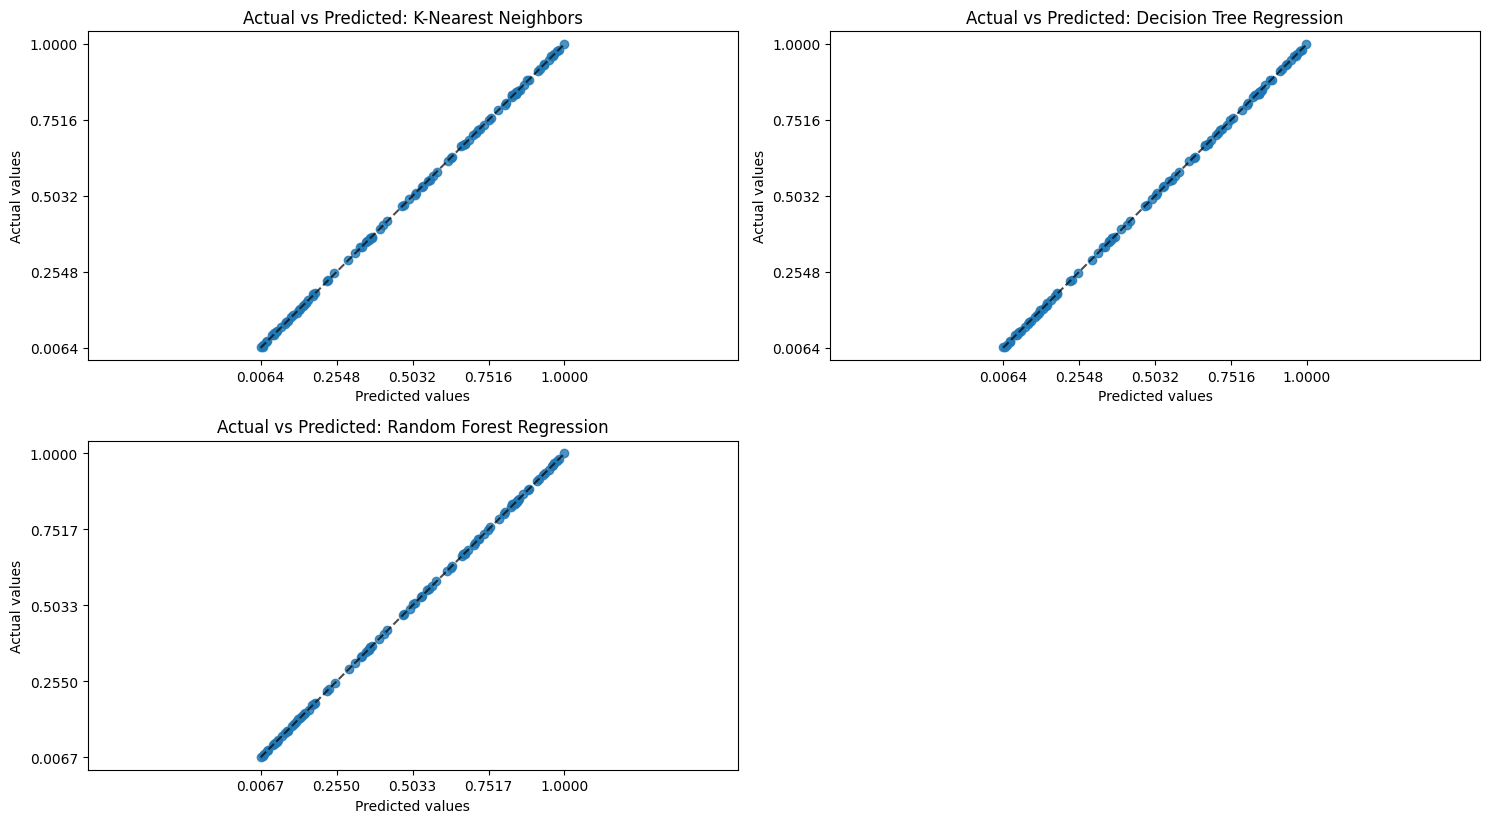

In [ ]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from IPython.display import display
train_data = data_temp_hr_scaled
test_size=0.2
random_state=42
train_data = train_data.dropna()
X,y = split_data(train_data)

# test_data = train_data[(train_data["Temprature"] == 30) & (train_data["hour"] == 0)]
# train_data = train_data[ (train_data["hour"] == 0)]

# display(test_data,train_data)
# X_train, y_train = split_data(train_data)
# X_test, y_test = split_data(test_data)
# Split training and test data into features (X) and labels (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
# display(X,y)



# Initialize a results list to store metrics for each model
results = {
    'Model': [],
    'MSE': [],
    'R2 Score': [],
    'MAE': [],
    'Mean % Error': []  # New column for mean percentage error
}
plt.figure(figsize=(15, 12))  # 4x2 grid for subplots
subplot_idx = 1

# Train and evaluate K-Nearest Neighbors model
knn_model = train_knn(X_train, y_train, n_neighbors=1)
y_pred_knn = predict(knn_model, X_test)
knn_metrics = evaluate_model(y_test, y_pred_knn)
store_results_and_plot(results, model_name='K-Nearest Neighbors', metrics=knn_metrics, y_test=y_test, y_pred=y_pred_knn)


# Train and evaluate Decision Tree Regression model
tree_model = train_decision_tree(X_train, y_train)
y_pred_tree = predict(tree_model, X_test)
tree_metrics = evaluate_model(y_test, y_pred_tree)
store_results_and_plot(results, model_name='Decision Tree Regression', metrics=tree_metrics, y_test=y_test, y_pred=y_pred_tree)


# Train and evaluate Random Forest Regression model
rf_model = train_random_forest(X_train, y_train)
y_pred_rf = predict(rf_model, X_test)
rf_metrics = evaluate_model(y_test, y_pred_rf)
store_results_and_plot(results, model_name='Random Forest Regression', metrics=rf_metrics, y_test=y_test, y_pred=y_pred_rf)


# Compare models
comparison_df = compare_models(results)  # Print results in console
plt.tight_layout()
plt.show()
# save_results_to_file(results)  # Save results to result.txt

# Create a DataFrame to save actual and predicted values
# predictions_df = pd.DataFrame({
#     'Actual I_pol(t)(uA)': y_test,
#     'Predicted Linear': y_pred_linear,
#     'Predicted Polynomial': y_pred_poly,
#     'Predicted Neural Network': y_pred_nn,
#     'Predicted KNN': y_pred_knn,
#     'Predicted SVR': y_pred_svr,
#     'Predicted Decision Tree': y_pred_tree,
#     'Predicted Random Forest': y_pred_rf,
#     'Predicted Gradient Boosting': y_pred_gb
# })

# Calculate percent error for each model and add to predictions_df
# predictions_df['Percent Error Linear'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Linear']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Polynomial'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Polynomial']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Neural Network'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Neural Network']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error KNN'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted KNN']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error SVR'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted SVR']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Decision Tree'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Decision Tree']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Random Forest'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Random Forest']) / predictions_df['Actual I_pol(t)(uA)']) * 100
# predictions_df['Percent Error Gradient Boosting'] = np.abs((predictions_df['Actual I_pol(t)(uA)'] - predictions_df['Predicted Gradient Boosting']) / predictions_df['Actual I_pol(t)(uA)']) * 100

# Save the DataFrame with predictions to a new CSV file
# predictions_df.to_csv('test_data_with_predictions.csv', index=False)
# print("Predicted values saved to 'test_data_with_predictions.csv'.")


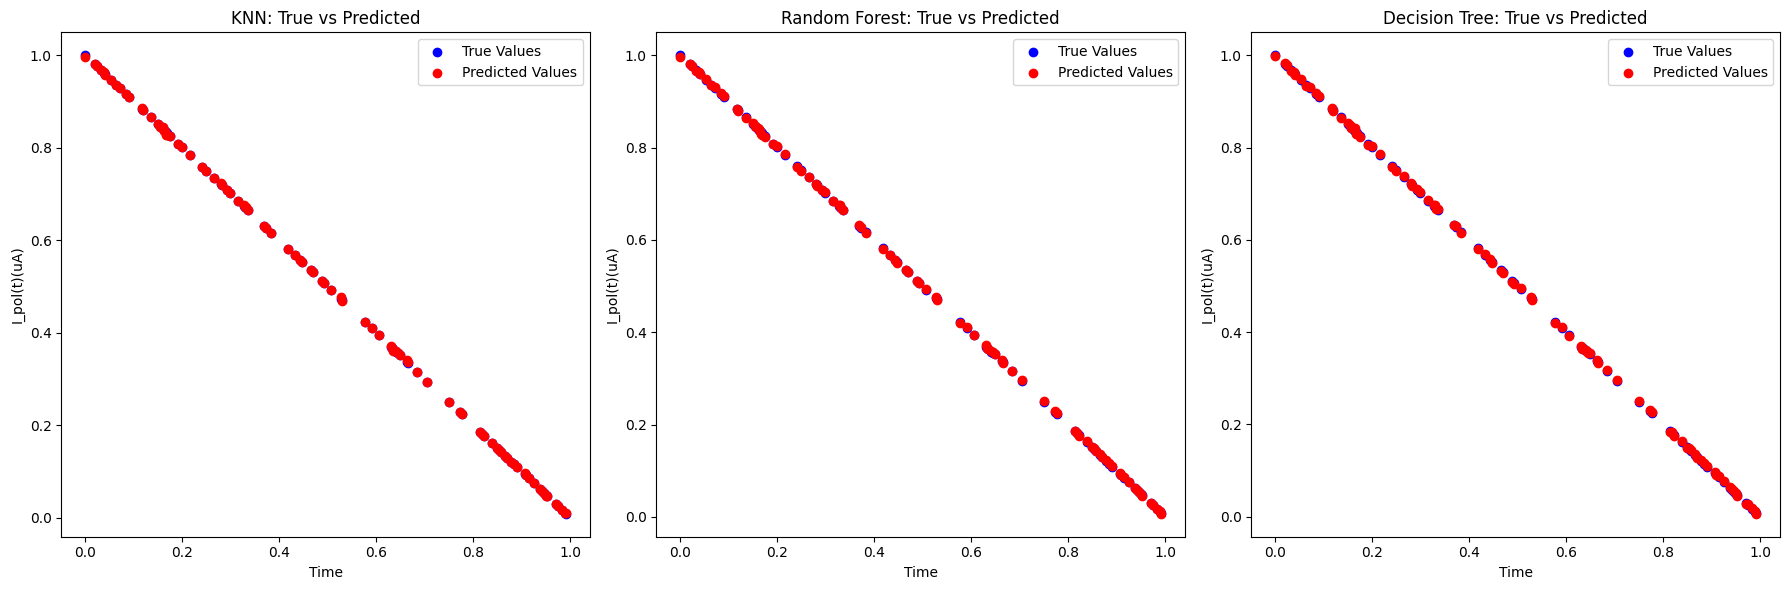

In [196]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Load your dataset (replace with your dataset)
import pandas as pd

X = data_temp_hr_scaled.iloc[:, :-3]  # Features
y = data_temp_hr_scaled.iloc[:, -3]   # Target variable (continuous)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
knn_regressor = KNeighborsRegressor(n_neighbors=2)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the models
knn_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_regressor.predict(X_test)
y_pred_rf = rf_regressor.predict(X_test)
y_pred_dt = dt_regressor.predict(X_test)

# Plotting the results for each model
plt.figure(figsize=(18, 6))

# KNN: Real vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='True Values')  # True values (y_test)
plt.scatter(X_test.iloc[:, 0], y_pred_knn, color='red', label='Predicted Values')  # Predicted values (y_pred_knn)
plt.xlabel('Time')
plt.ylabel('I_pol(t)(uA)')
plt.title('KNN: True vs Predicted')
plt.legend()

# Random Forest: Real vs Predicted
plt.subplot(1, 3, 2)
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='True Values')  # True values (y_test)
plt.scatter(X_test.iloc[:, 0], y_pred_rf, color='red', label='Predicted Values')  # Predicted values (y_pred_rf)
plt.xlabel('Time')
plt.ylabel('I_pol(t)(uA)')
plt.title('Random Forest: True vs Predicted')
plt.legend()

# Decision Tree: Real vs Predicted
plt.subplot(1, 3, 3)
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='True Values')  # True values (y_test)
plt.scatter(X_test.iloc[:, 0], y_pred_dt, color='red', label='Predicted Values')  # Predicted values (y_pred_dt)
plt.xlabel('Time')
plt.ylabel('I_pol(t)(uA)')
plt.title('Decision Tree: True vs Predicted')
plt.legend()

plt.tight_layout()  # Adjust subplots to fit the figure area
plt.show()


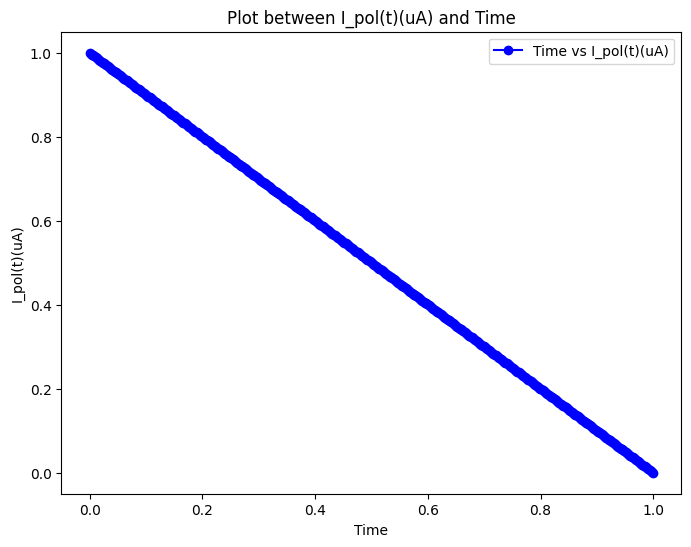

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Option 1: Using Matplotlib (Simple Line Plot)
plt.figure(figsize=(8, 6))
plt.plot(data_temp_hr_scaled['Time'], data_temp_hr_scaled['I_pol(t)(uA)'], marker='o', color='b', label='Time vs I_pol(t)(uA)')
plt.xlabel('Time')
plt.ylabel('I_pol(t)(uA)')
plt.title('Plot between I_pol(t)(uA) and Time')
plt.legend()
plt.show()
